### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [3]:
### Data Collection
import pandas_datareader as pdr
key="75887c359322cd76d4a76f0caa25dac9f5a72773"

In [4]:
df = pdr.get_data_tiingo('GS', api_key=key)

In [5]:
df.to_csv('GS.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('GS.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GS,2016-07-25 00:00:00+00:00,160.51,161.33,159.61,159.64,1956099,147.486220,148.239685,146.659246,146.686811,1956099,0.0,1.0
1,GS,2016-07-26 00:00:00+00:00,161.16,161.50,159.42,160.68,2147846,148.083479,148.395891,146.484662,147.642426,2147846,0.0,1.0
2,GS,2016-07-27 00:00:00+00:00,160.99,162.17,160.41,161.20,2317561,147.927272,149.011527,147.394334,148.120233,2317561,0.0,1.0
3,GS,2016-07-28 00:00:00+00:00,160.53,160.96,158.84,160.18,2047424,147.504597,147.899707,145.951723,147.182996,2047424,0.0,1.0
4,GS,2016-07-29 00:00:00+00:00,158.81,160.19,158.65,159.51,2388134,145.924158,147.192184,145.777140,146.567360,2388134,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,GS,2021-07-19 00:00:00+00:00,354.72,355.1900,349.00,354.00,4394635,354.72,355.1900,349.00,354.00,4394635,0.0,1.0
1255,GS,2021-07-20 00:00:00+00:00,364.76,367.3100,351.54,352.27,2937859,364.76,367.3100,351.54,352.27,2937859,0.0,1.0
1256,GS,2021-07-21 00:00:00+00:00,373.50,374.9000,367.93,368.04,2398848,373.50,374.9000,367.93,368.04,2398848,0.0,1.0
1257,GS,2021-07-22 00:00:00+00:00,372.71,373.6938,368.45,372.30,1887130,372.71,373.6938,368.45,372.30,1887130,0.0,1.0
1258,GS,2021-07-23 00:00:00+00:00,374.05,378.0000,371.38,374.59,1707088,374.05,378.0000,371.38,374.59,1707088,0.0,1.0


In [10]:
df1=df.reset_index()['close']

In [11]:
df1

0       160.51
1       161.16
2       160.99
3       160.53
4       158.81
         ...  
1254    354.72
1255    364.76
1256    373.50
1257    372.71
1258    374.05
Name: close, Length: 1259, dtype: float64

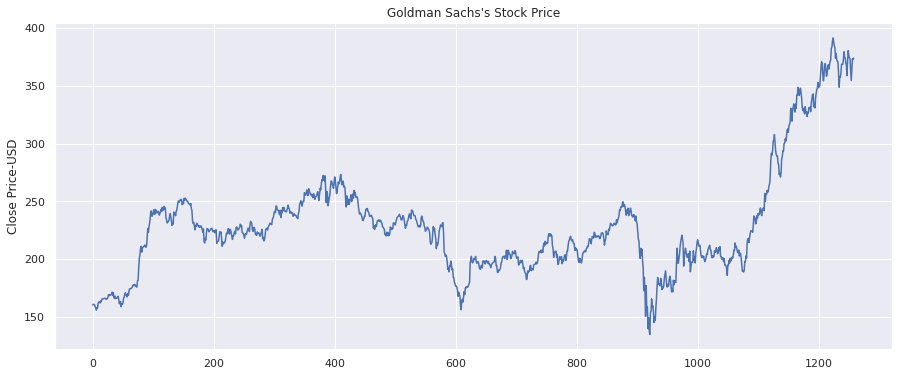

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
sns.set()
plt.title("Goldman Sachs's Stock Price")

plt.ylabel('Close Price-USD')
plt.plot(df["close"])

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [19]:
import numpy as np

In [20]:
df1

0       160.51
1       161.16
2       160.99
3       160.53
4       158.81
         ...  
1254    354.72
1255    364.76
1256    373.50
1257    372.71
1258    374.05
Name: close, Length: 1259, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
print(df1)

[[0.09957891]
 [0.10211323]
 [0.10145041]
 ...
 [0.93001404]
 [0.92693387]
 [0.93215845]]


In [23]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(818, 441)

In [25]:
train_data

array([[0.09957891],
       [0.10211323],
       [0.10145041],
       [0.09965689],
       [0.09295072],
       [0.09049439],
       [0.08222863],
       [0.09111822],
       [0.08998752],
       [0.10573924],
       [0.10862445],
       [0.11100281],
       [0.10612913],
       [0.11264036],
       [0.11026201],
       [0.11922957],
       [0.11961946],
       [0.11969744],
       [0.12121803],
       [0.12188085],
       [0.12199782],
       [0.12129601],
       [0.11825483],
       [0.1205942 ],
       [0.12086712],
       [0.12437617],
       [0.13412352],
       [0.13447442],
       [0.13077043],
       [0.13338272],
       [0.13396756],
       [0.1352932 ],
       [0.14305209],
       [0.13100437],
       [0.14071273],
       [0.12488303],
       [0.12160792],
       [0.12909389],
       [0.12098409],
       [0.12180287],
       [0.12281659],
       [0.125     ],
       [0.12885995],
       [0.11759201],
       [0.10336089],
       [0.10885839],
       [0.1110418 ],
       [0.093

In [26]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [57]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [58]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 27s 551ms/step - loss: 0.0415 - val_loss: 0.0347
Epoch 2/100
12/12 [==============================] - 5s 444ms/step - loss: 0.0059 - val_loss: 0.0160
Epoch 3/100
12/12 [==============================] - 5s 422ms/step - loss: 0.0033 - val_loss: 0.0308
Epoch 4/100
12/12 [==============================] - 5s 433ms/step - loss: 0.0024 - val_loss: 0.0208
Epoch 5/100
12/12 [==============================] - 5s 397ms/step - loss: 0.0021 - val_loss: 0.0155
Epoch 6/100
12/12 [==============================] - 5s 454ms/step - loss: 0.0018 - val_loss: 0.0112
Epoch 7/100
12/12 [==============================] - 5s 425ms/step - loss: 0.0015 - val_loss: 0.0078
Epoch 8/100
12/12 [==============================] - 5s 372ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 9/100
12/12 [==============================] - 5s 452ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 10/100
12/12 [==============================] - 5s 425ms/step - loss: 0.0012 - val_l

Epoch 79/100
12/12 [==============================] - 5s 404ms/step - loss: 3.5449e-04 - val_loss: 0.0011
Epoch 80/100
12/12 [==============================] - 4s 320ms/step - loss: 3.2381e-04 - val_loss: 8.3284e-04
Epoch 81/100
12/12 [==============================] - 5s 434ms/step - loss: 3.1707e-04 - val_loss: 8.4637e-04
Epoch 82/100
12/12 [==============================] - 7s 591ms/step - loss: 3.2297e-04 - val_loss: 8.4990e-04
Epoch 83/100
12/12 [==============================] - 7s 622ms/step - loss: 2.9918e-04 - val_loss: 8.2357e-04
Epoch 84/100
12/12 [==============================] - 5s 434ms/step - loss: 3.0654e-04 - val_loss: 0.0016
Epoch 85/100
12/12 [==============================] - 6s 535ms/step - loss: 3.8637e-04 - val_loss: 0.0010
Epoch 86/100
12/12 [==============================] - 5s 398ms/step - loss: 3.0526e-04 - val_loss: 8.4456e-04
Epoch 87/100
12/12 [==============================] - 5s 420ms/step - loss: 2.8858e-04 - val_loss: 9.6148e-04
Epoch 88/100
12/12 [==

In [62]:
import tensorflow as tf

In [63]:
tf.__version__

'2.5.0'

In [64]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [65]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [66]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

225.48142449308233

In [67]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

267.4130244024911

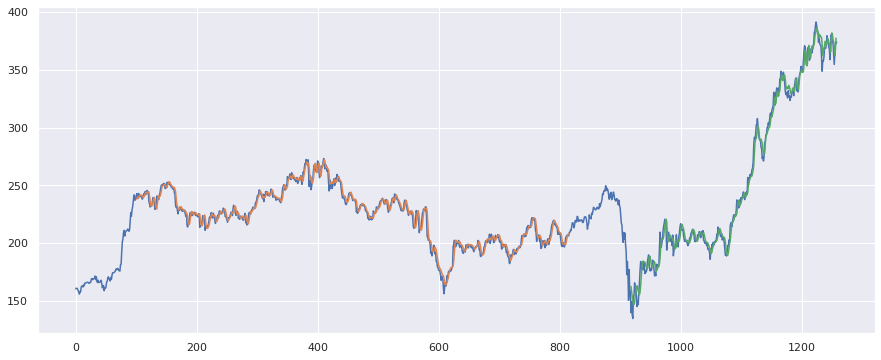

In [68]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [69]:
len(test_data)

441

In [70]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [71]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [72]:
temp_input

[0.7776824703680598,
 0.75764192139738,
 0.7501559575795382,
 0.7767467248908297,
 0.7627105427323766,
 0.8072754210854647,
 0.8075873362445416,
 0.8337492202121022,
 0.8229881472239551,
 0.8060667498440424,
 0.8186993137866498,
 0.8305910792264504,
 0.8157751091703056,
 0.7967872738615096,
 0.7673112913287585,
 0.755146600124766,
 0.7625545851528384,
 0.7502339363693074,
 0.7437616968184655,
 0.7682470368059886,
 0.7487133499688083,
 0.7512086712414223,
 0.7352230193387399,
 0.7489472863381159,
 0.746958827199002,
 0.7648549594510292,
 0.7635683094198378,
 0.7675842170929505,
 0.7513646288209608,
 0.7812694946974423,
 0.7937461010605116,
 0.8084061135371179,
 0.8114472863381159,
 0.767740174672489,
 0.7809575795383654,
 0.7637242669993762,
 0.7968652526512789,
 0.8131238303181534,
 0.8252495321272613,
 0.8310199625701808,
 0.8499688084840924,
 0.832345601996257,
 0.8390127885215222,
 0.8377651278852152,
 0.8680988771054272,
 0.9006550218340612,
 0.9198378041172799,
 0.9112211478477854

In [73]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9449897]
101
1 day input [0.75764192 0.75015596 0.77674672 0.76271054 0.80727542 0.80758734
 0.83374922 0.82298815 0.80606675 0.81869931 0.83059108 0.81577511
 0.79678727 0.76731129 0.7551466  0.76255459 0.75023394 0.7437617
 0.76824704 0.74871335 0.75120867 0.73522302 0.74894729 0.74695883
 0.76485496 0.76356831 0.76758422 0.75136463 0.78126949 0.7937461
 0.80840611 0.81144729 0.76774017 0.78095758 0.76372427 0.79686525
 0.81312383 0.82524953 0.83101996 0.84996881 0.8323456  0.83901279
 0.83776513 0.86809888 0.90065502 0.9198378  0.91122115 0.87706644
 0.85554429 0.87273862 0.91157205 0.91344354 0.89515752 0.87106207
 0.87652059 0.90178571 0.90970056 0.89496257 0.90623051 0.9217093
 0.92424361 0.96487056 0.96876949 0.9893559  1.         0.98717249
 0.97368216 0.96619619 0.93172957 0.94775421 0.92775265 0.92143637
 0.92026669 0.88322676 0.8338272  0.86778696 0.86774797 0.88147224
 0.91149407 0.91157205 0.91133812 0.92658297 0.95352464 0.93582346
 0.93258734 0.9158219  0.90728322 0.8

8 day output [[0.9617216]]
9 day input [0.80606675 0.81869931 0.83059108 0.81577511 0.79678727 0.76731129
 0.7551466  0.76255459 0.75023394 0.7437617  0.76824704 0.74871335
 0.75120867 0.73522302 0.74894729 0.74695883 0.76485496 0.76356831
 0.76758422 0.75136463 0.78126949 0.7937461  0.80840611 0.81144729
 0.76774017 0.78095758 0.76372427 0.79686525 0.81312383 0.82524953
 0.83101996 0.84996881 0.8323456  0.83901279 0.83776513 0.86809888
 0.90065502 0.9198378  0.91122115 0.87706644 0.85554429 0.87273862
 0.91157205 0.91344354 0.89515752 0.87106207 0.87652059 0.90178571
 0.90970056 0.89496257 0.90623051 0.9217093  0.92424361 0.96487056
 0.96876949 0.9893559  1.         0.98717249 0.97368216 0.96619619
 0.93172957 0.94775421 0.92775265 0.92143637 0.92026669 0.88322676
 0.8338272  0.86778696 0.86774797 0.88147224 0.91149407 0.91157205
 0.91133812 0.92658297 0.95352464 0.93582346 0.93258734 0.9158219
 0.90728322 0.87324548 0.92322988 0.95730661 0.93968341 0.93352308
 0.9294292  0.89609326 0

17 day output [[0.9906161]]
18 day input [0.7437617  0.76824704 0.74871335 0.75120867 0.73522302 0.74894729
 0.74695883 0.76485496 0.76356831 0.76758422 0.75136463 0.78126949
 0.7937461  0.80840611 0.81144729 0.76774017 0.78095758 0.76372427
 0.79686525 0.81312383 0.82524953 0.83101996 0.84996881 0.8323456
 0.83901279 0.83776513 0.86809888 0.90065502 0.9198378  0.91122115
 0.87706644 0.85554429 0.87273862 0.91157205 0.91344354 0.89515752
 0.87106207 0.87652059 0.90178571 0.90970056 0.89496257 0.90623051
 0.9217093  0.92424361 0.96487056 0.96876949 0.9893559  1.
 0.98717249 0.97368216 0.96619619 0.93172957 0.94775421 0.92775265
 0.92143637 0.92026669 0.88322676 0.8338272  0.86778696 0.86774797
 0.88147224 0.91149407 0.91157205 0.91133812 0.92658297 0.95352464
 0.93582346 0.93258734 0.9158219  0.90728322 0.87324548 0.92322988
 0.95730661 0.93968341 0.93352308 0.9294292  0.89609326 0.85679195
 0.89593731 0.93001404 0.92693387 0.93215845 0.94498968 0.94522619
 0.94507188 0.94510943 0.94624

27 day output [[1.0237808]]
28 day input [0.75136463 0.78126949 0.7937461  0.80840611 0.81144729 0.76774017
 0.78095758 0.76372427 0.79686525 0.81312383 0.82524953 0.83101996
 0.84996881 0.8323456  0.83901279 0.83776513 0.86809888 0.90065502
 0.9198378  0.91122115 0.87706644 0.85554429 0.87273862 0.91157205
 0.91344354 0.89515752 0.87106207 0.87652059 0.90178571 0.90970056
 0.89496257 0.90623051 0.9217093  0.92424361 0.96487056 0.96876949
 0.9893559  1.         0.98717249 0.97368216 0.96619619 0.93172957
 0.94775421 0.92775265 0.92143637 0.92026669 0.88322676 0.8338272
 0.86778696 0.86774797 0.88147224 0.91149407 0.91157205 0.91133812
 0.92658297 0.95352464 0.93582346 0.93258734 0.9158219  0.90728322
 0.87324548 0.92322988 0.95730661 0.93968341 0.93352308 0.9294292
 0.89609326 0.85679195 0.89593731 0.93001404 0.92693387 0.93215845
 0.94498968 0.94522619 0.94507188 0.94510943 0.94624817 0.9488824
 0.95276564 0.95726806 0.9617216  0.96568036 0.96902061 0.97189158
 0.97457707 0.97734714 0

In [74]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [75]:
import matplotlib.pyplot as plt

In [76]:
len(df1)

1259

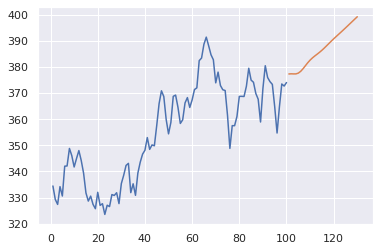

In [77]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

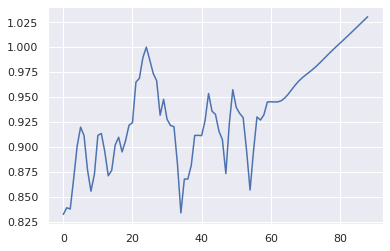

In [78]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [79]:
df3=scaler.inverse_transform(df3).tolist()

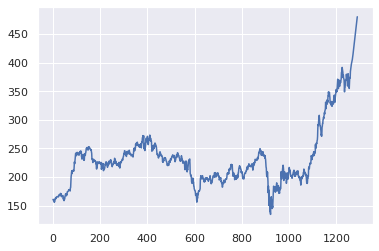

In [56]:
plt.plot(df3)